In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50) 

In [5]:
df2 = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_5000_movies.csv',encoding='unicode_escape')  
df1 = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_5000_credits.csv',encoding='utf-8')

In [6]:
df1.columns 

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id') 

In [8]:
df2.shape 

(4803, 23)

In [9]:
df2.columns 

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [10]:
df2.head() 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond__ past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Français""}, {""is...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [12]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,_·ã__»ã__¸ã_
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,AstÃ©rix aux Jeux Olympiques
317,The Flowers of War,_______
474,Evolution,_volution


In [13]:
df2 = df2.drop('original_title', axis=1)

In [14]:
df2[df2['revenue'] == 0].shape 

(1427, 22)

In [15]:
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
df2['budget'] = df2['budget'].replace(0, np.nan)
df2[df2['budget'].isnull()].shape 

(1037, 22)

In [16]:
df2['return'] = df2['revenue'] / df2['budget']
df2[df2['return'].isnull()].shape 

(1037, 23)

In [17]:
df2['production_countries'] 

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [18]:
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [19]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')

In [20]:
title_corpus = ' '.join(df2['title'])
overview_corpus = ' '.join(df2['overview'])

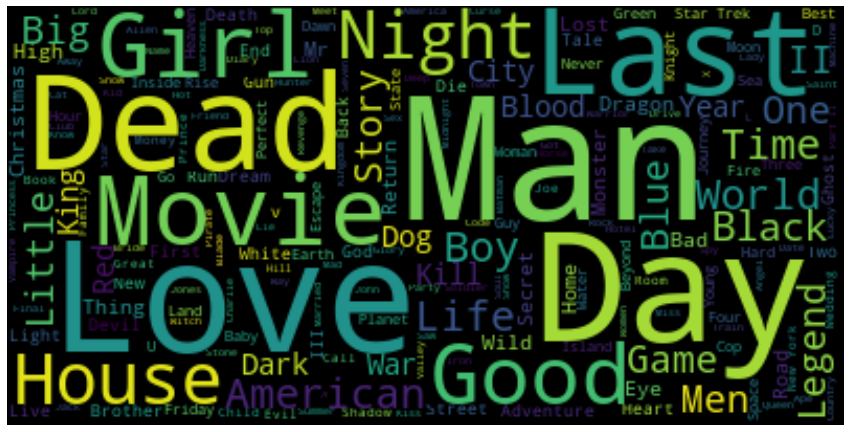

In [21]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(title_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

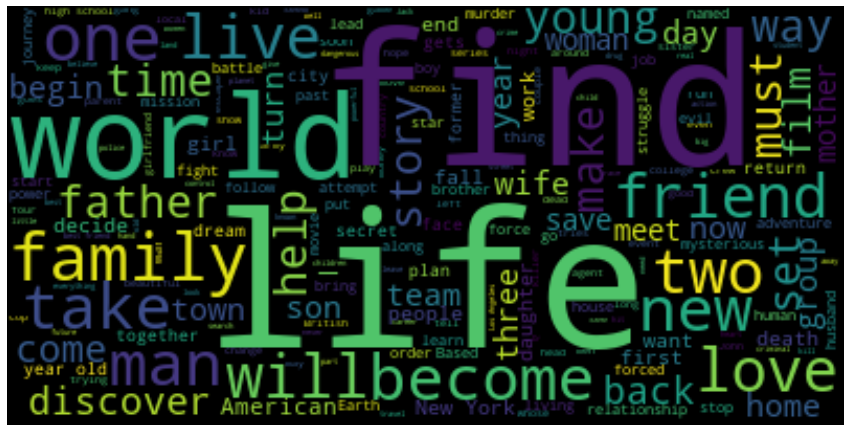

In [22]:
wordcloud = WordCloud().generate(overview_corpus)
plt.figure(figsize=(15,15))# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

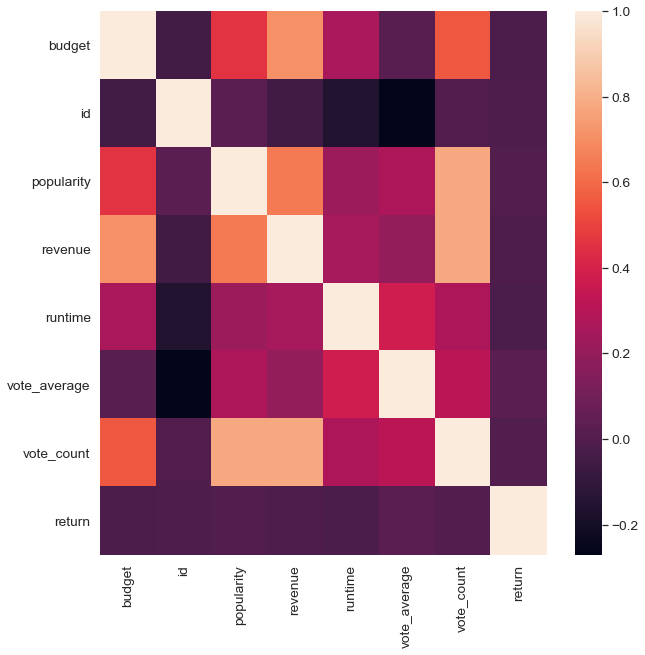

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr())
plt.show()

In [25]:
df2[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
96,Inception,13752,2010
65,The Dark Knight,12002,2008
0,Avatar,11800,2009
16,The Avengers,11776,2012
788,Deadpool,10995,2016
95,Interstellar,10867,2014
287,Django Unchained,10099,2012
94,Guardians of the Galaxy,9742,2014
426,The Hunger Games,9455,2012
127,Mad Max: Fury Road,9427,2015


In [26]:
most_popular_movies_and_return = df2[['title', 'vote_count', 'year','revenue','return']].sort_values('vote_count', ascending=False)

In [27]:
most_popular_movies_and_return=most_popular_movies_and_return[most_popular_movies_and_return['revenue']>=1000000000]

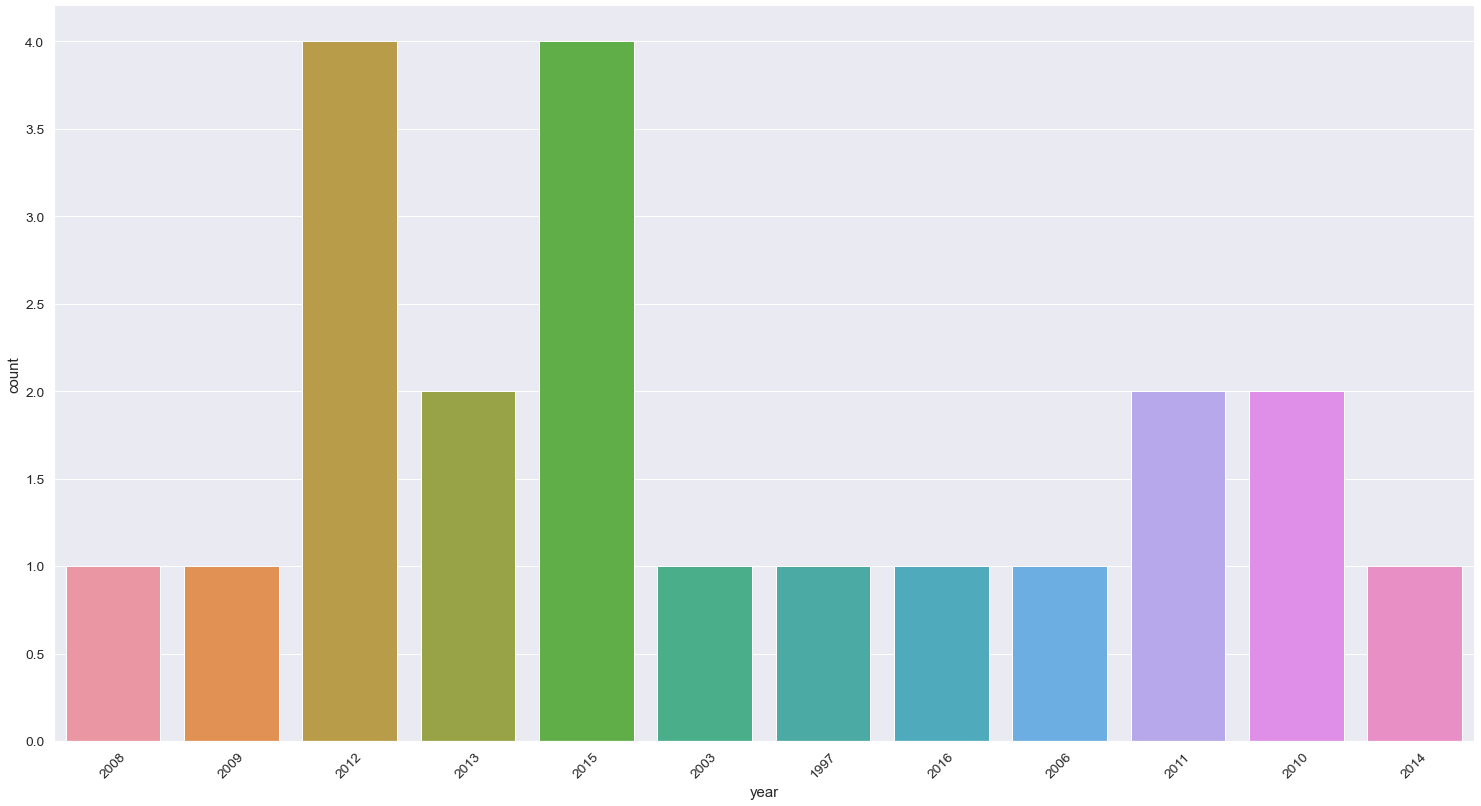

In [28]:
# sns.catplot(x="Surface", data=injury,hue='BodyPart', kind="count")
chart = sns.catplot(x="year", data=most_popular_movies_and_return, kind="count")
chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(24, 12) 

In [29]:
df2[df2['vote_count'] > 3000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,8205,1994
3337,The Godfather,8.4,5893,1972
3865,Whiplash,8.3,4254,2014
2294,Spirited Away,8.3,3840,2001
1818,Schindler's List,8.3,4329,1993
3232,Pulp Fiction,8.3,8428,1994
662,Fight Club,8.3,9413,1999
2731,The Godfather: Part II,8.3,3338,1974
809,Forrest Gump,8.2,7927,1994
690,The Green Mile,8.2,4048,1999


In [31]:
df2['genres'] = df2['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [32]:
s = df2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [33]:
gen_df = df2.drop('genres', axis=1).join(s)
df2.head() 

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,return,year
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond__ past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012


In [34]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10) 

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


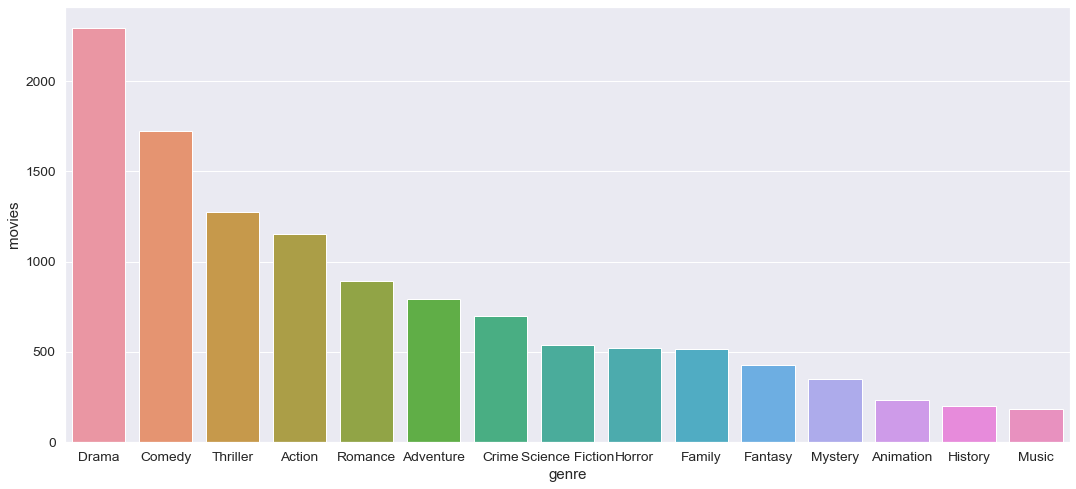

In [35]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show() 

In [36]:
res = df2.set_index(['popularity', 'revenue'])['genres'].apply(pd.Series).stack()
res = res.reset_index()
res.columns = ['popularity','revenue','sample_num','genre']
res.drop('sample_num',axis=1,inplace=True)
res 

,popularity,revenue,genre
0,150.437577,2787965087,Action
1,150.437577,2787965087,Adventure
2,150.437577,2787965087,Fantasy
3,150.437577,2787965087,Science Fiction
4,139.082615,961000000,Adventure
...,...,...,...
12155,1.444476,0,Comedy
12156,1.444476,0,Drama
12157,1.444476,0,Romance
12158,1.444476,0,TV Movie


In [37]:
res_400=res[res['revenue']>=400000000] 

In [38]:
df2[df2['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17,Pirates of the Caribbean: On Stranger Tides,380000000.0,1045713802,2.751878,2011
1,Pirates of the Caribbean: At World's End,300000000.0,961000000,3.203333,2007
7,Avengers: Age of Ultron,280000000.0,1405403694,5.019299,2015
10,Superman Returns,270000000.0,391081192,1.448449,2006
4,John Carter,260000000.0,284139100,1.092843,2012
6,Tangled,260000000.0,591794936,2.276134,2010
5,Spider-Man 3,258000000.0,890871626,3.452991,2007
13,The Lone Ranger,255000000.0,89289910,0.350157,2013
46,X-Men: Days of Future Past,250000000.0,747862775,2.991451,2014
22,The Hobbit: The Desolation of Smaug,250000000.0,958400000,3.833600,2013


In [39]:
gross_top = df2[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top 

,title,budget,revenue,year
0,Avatar,237000000.0,2787965087,2009
25,Titanic,200000000.0,1845034188,1997
16,The Avengers,220000000.0,1519557910,2012
28,Jurassic World,150000000.0,1513528810,2015
44,Furious 7,190000000.0,1506249360,2015
7,Avengers: Age of Ultron,280000000.0,1405403694,2015
124,Frozen,150000000.0,1274219009,2013
31,Iron Man 3,200000000.0,1215439994,2013
546,Minions,74000000.0,1156730962,2015
26,Captain America: Civil War,250000000.0,1153304495,2016


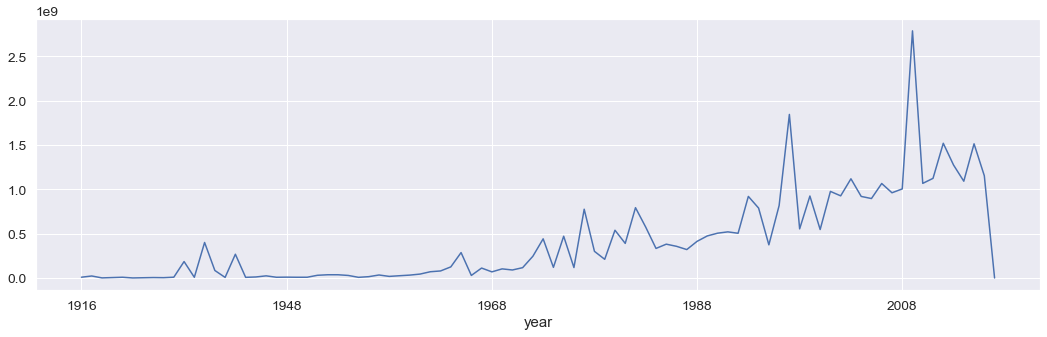

In [40]:
plt.figure(figsize=(18,5))
year_revenue = df2[(df2['revenue'].notnull()) & (df2['year'] != 'NaT')].groupby('year')['revenue'].max()
# plt.plot(year_revenue.index, year_revenue)
# chart = plt.plot(year_revenue.index, year_revenue)
# chart.set_xticklabels(rotation=45)
# plt.gcf().set_size_inches(16, 8)
# plt.show()
year_revenue.plot(kind='line') 

In [41]:
s = df2.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre' 

In [42]:
gen_df = df2.drop('genres', axis=1).join(s) 

In [43]:
pop_genre = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_genre.columns = ['genre', 'movies']
pop_gen.head(10) 

,genre,movies
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


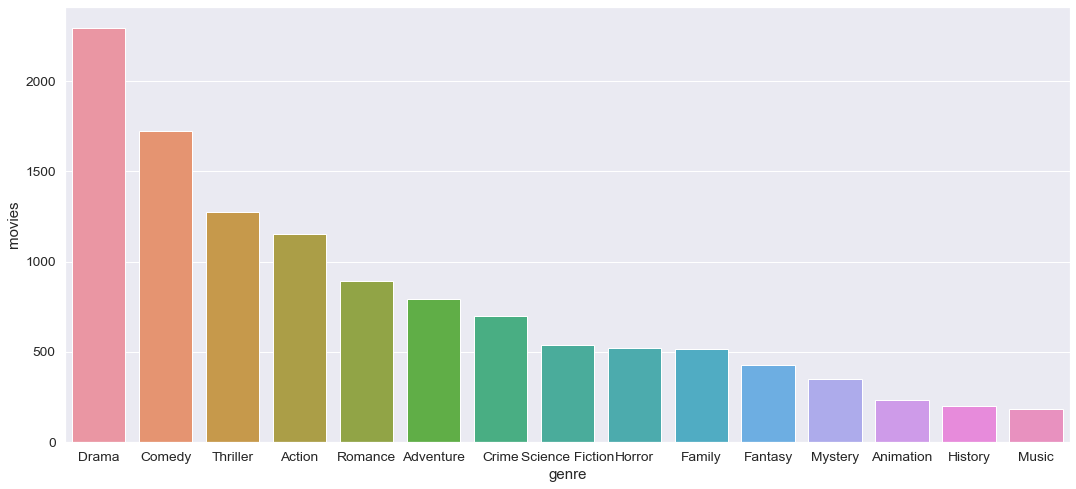

In [44]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show() 

In [45]:
df2

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,return,year
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",11.763566,2009
1,300000000.0,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",3.203333,2007
2,245000000.0,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond__ past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",3.594590,2015
3,250000000.0,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",4.339756,2012
4,260000000.0,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1.092843,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,"[Action, Crime, Thriller]",NaN,9367,"[{""id"": 5616, ""name"": ""united states–mexico ba...",es,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",9.276909,1992
4799,9000.0,"[Comedy, Romance]",NaN,72766,[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",0.000000,2011
4800,NaN,"[Comedy, Drama, Romance, TV Movie]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{

In [47]:
def getcrew_job(x):
    a=[]
    for i in x:
        a.append(i['job'])
    return a

sub2=df2[['crew','vote_average']]
#crew_dict=json.load(sub2.crew.values)
print(type(sub2.crew))
sub2.crew=sub2.crew.apply(json.loads)
crew_job=sub2.crew.apply(getcrew_job)
result = crew_job.apply(pd.value_counts) #result is dataframe
result=result.fillna(0)  #substitute "NaN" to 0
result_top10=result.head(10) #just print the first 10 lines
result_top10['col_sum'] = result_top10.apply(lambda x: x.sum(), axis=1) #the sum of all crews and save it to col_sum
print(result_top10)

<class 'pandas.core.series.Series'>
   24 Frame Playback  2D Artist  2D Supervisor  3D Animator  3D Artist  \
0                0.0        0.0            0.0          0.0        0.0   
1                0.0        0.0            0.0          0.0        0.0   
2                0.0        0.0            0.0          0.0        0.0   
3                0.0        0.0            0.0          0.0        0.0   
4                0.0        0.0            0.0          0.0        0.0   
5                0.0        0.0            0.0          0.0        0.0   
6                0.0        0.0            0.0          0.0        0.0   
7                0.0        0.0            0.0          0.0        0.0   
8                0.0        0.0            0.0          0.0        0.0   
9                0.0        0.0            0.0          0.0        0.0   

   3D Coordinator  3D Modeller  3D Supervisor  ADR & Dubbing  ADR Editor  ...  \
0             0.0          0.0            0.0            0.0        

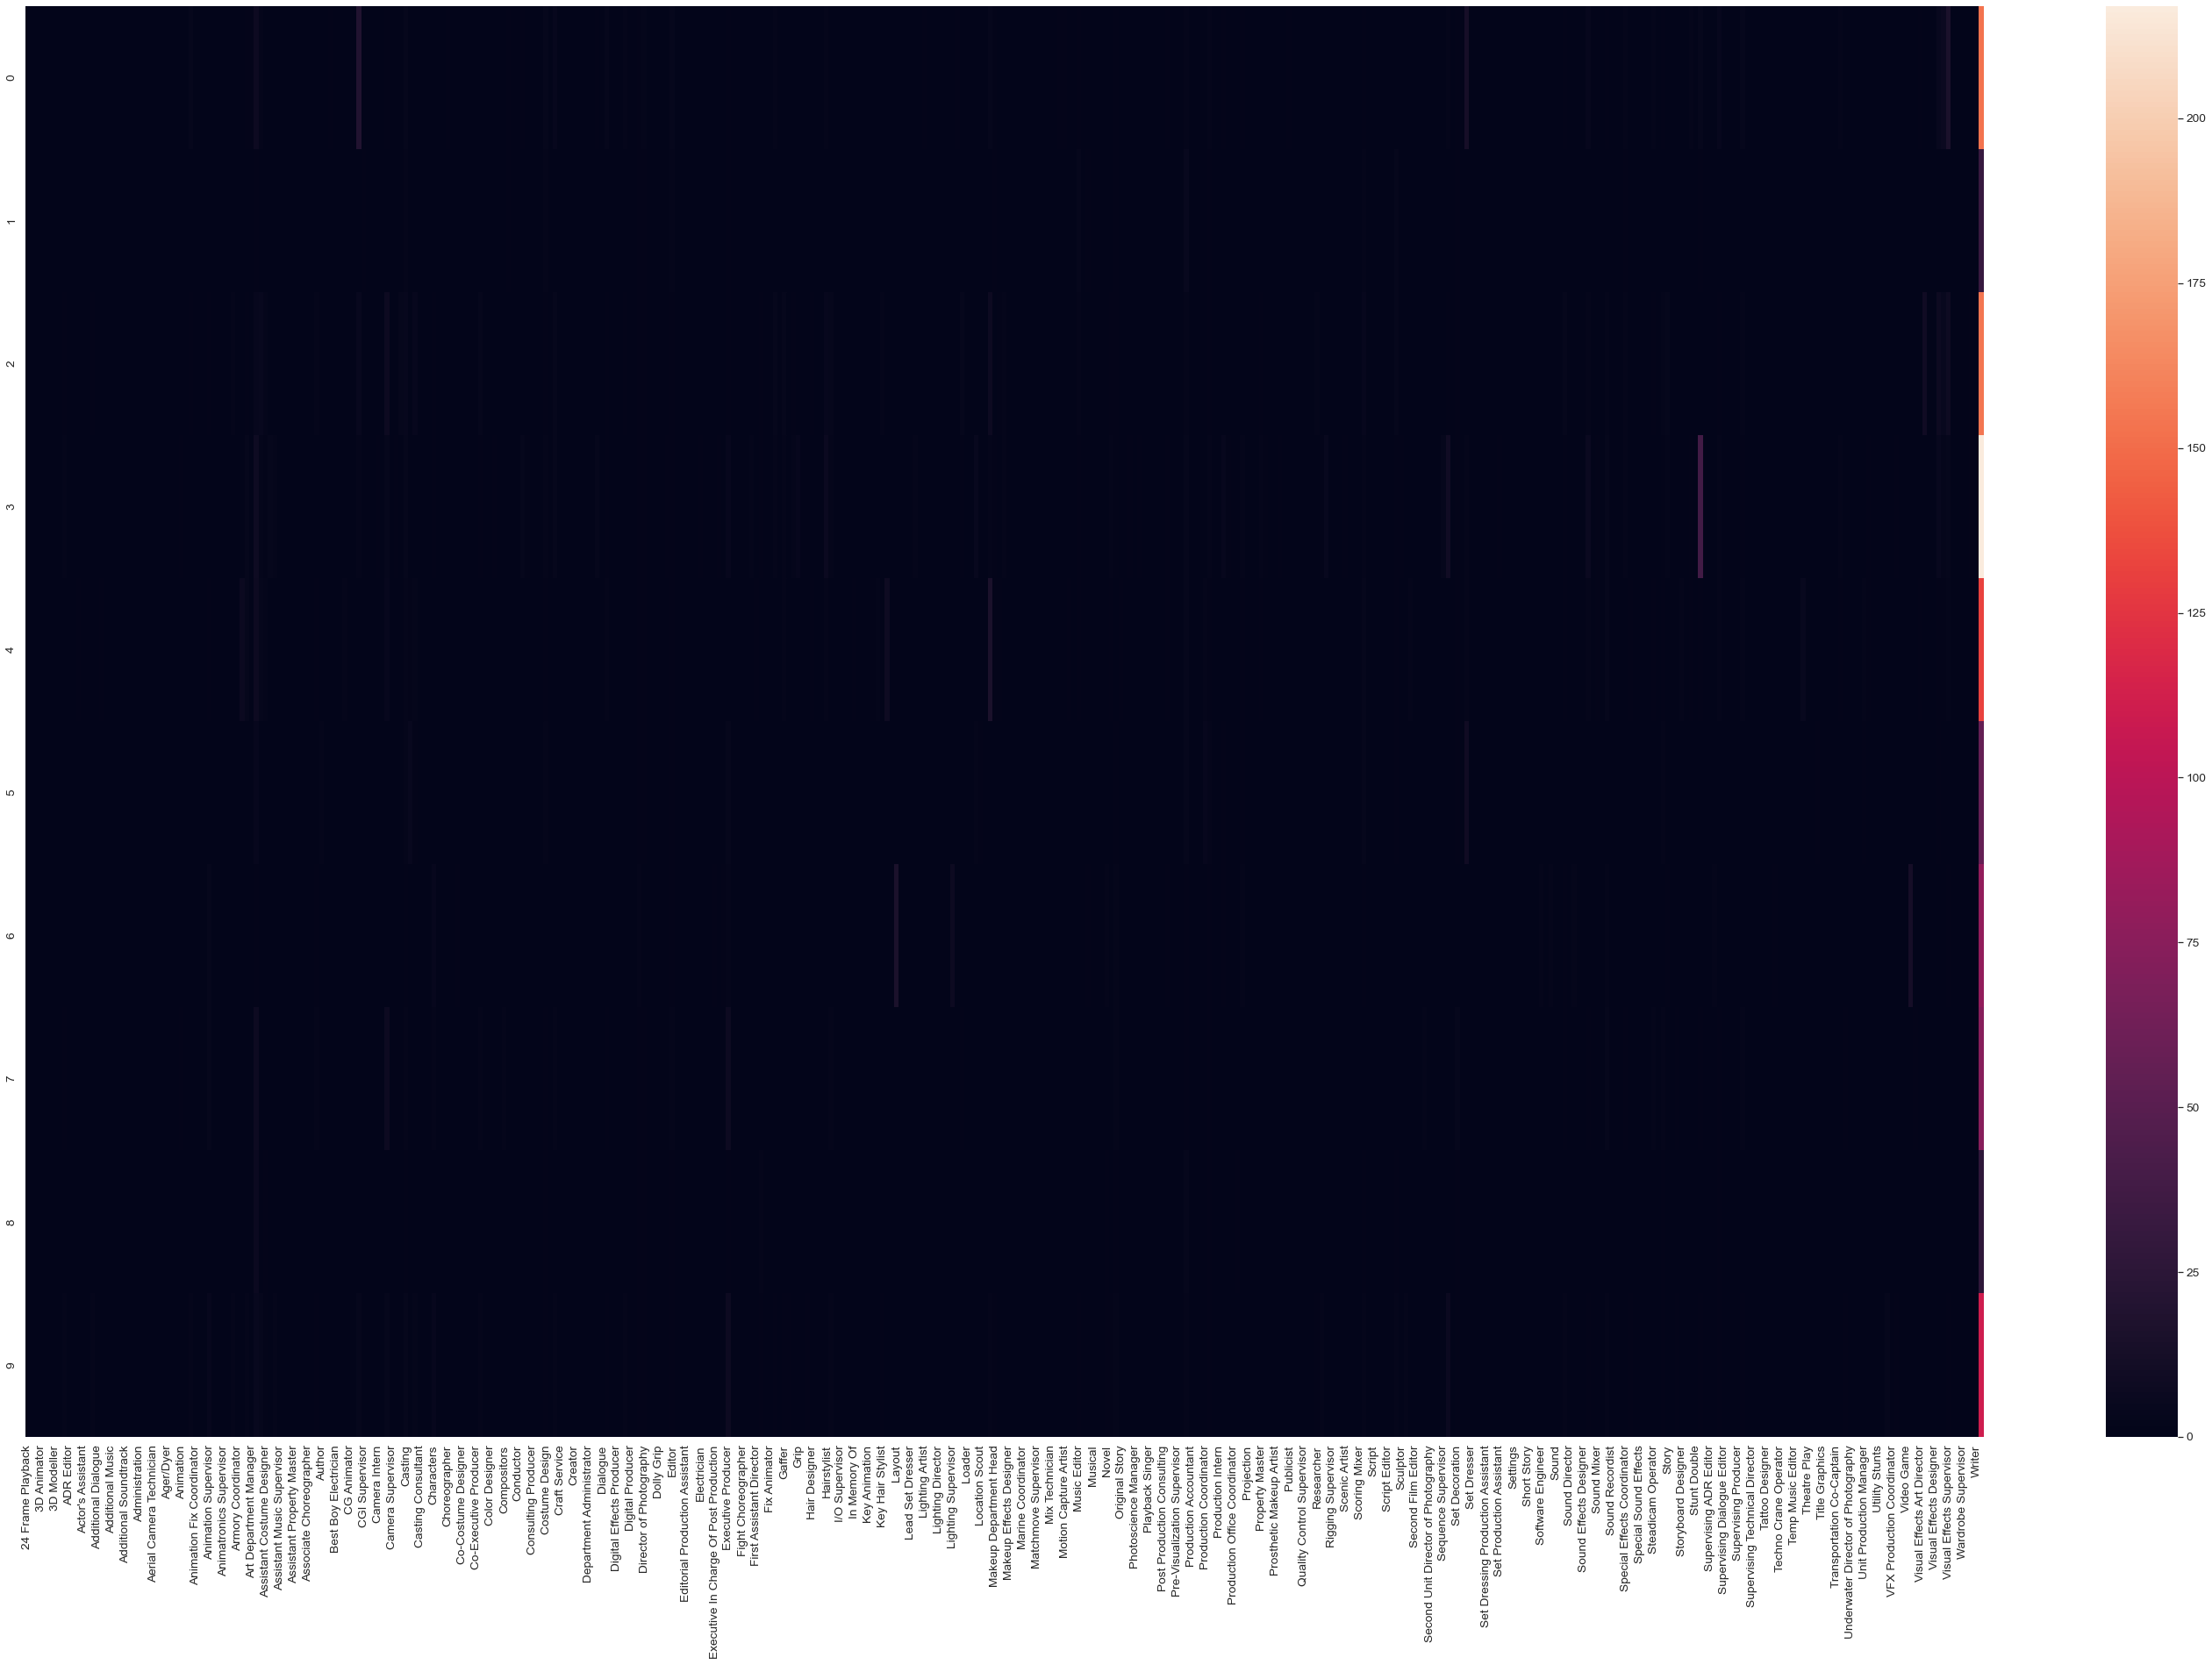

In [48]:
plt.figure(figsize=(50, 30))
sns.heatmap(result_top10, annot=False, fmt=".1f")
plt.show() 

In [49]:
def get_keywords(x):
    a=[]
    for i in x:
        a.append(i['name'])
    return a

sub3=df2[['keywords']]
sub3.keywords=sub3.keywords.apply(json.loads)
keywords=sub3.keywords.apply(get_keywords)
result2 = keywords.apply(pd.value_counts) 
# result2.loc['Row_sum'] = result2.apply(lambda x: x.sum())
result2=result2.fillna(0)  #substitute "NaN" to 0
result2['Col_sum'] = result2.apply(lambda x: x.sum(), axis=1)
result_top10_2=result2.head(10)
print(result_top10_2)
print(result_top10_2.keys()) # get the colomn name 

JSONDecodeError: Expecting ',' delimiter: line 1 column 118 (char 117)

In [50]:
sub4=df2[['crew','keywords']]
sub4.crew=sub4.crew.apply(json.loads) 
sub4.crew=sub4.crew.apply(getcrew_job)
sub4.keywords=sub4.keywords.apply(json.loads)
sub4.keywords=sub4.keywords.apply(get_keywords) # sub4.crew type: series
result4 = sub4.crew.apply(pd.value_counts) #result4 type: dataframe

result4=pd.concat([result4,sub4.keywords.apply(pd.value_counts)]) # combine two dataframes
result4=result4.fillna(0)  
result_top10_4=result4.head(10)
print(result_top10_4) 

JSONDecodeError: Expecting ',' delimiter: line 1 column 118 (char 117)